In [8]:
from fastai.vision import *
from fastai.metrics import error_rate

In [9]:
path = untar_data(URLs.MNIST_TINY)
tfms = get_transforms(do_flip=False)

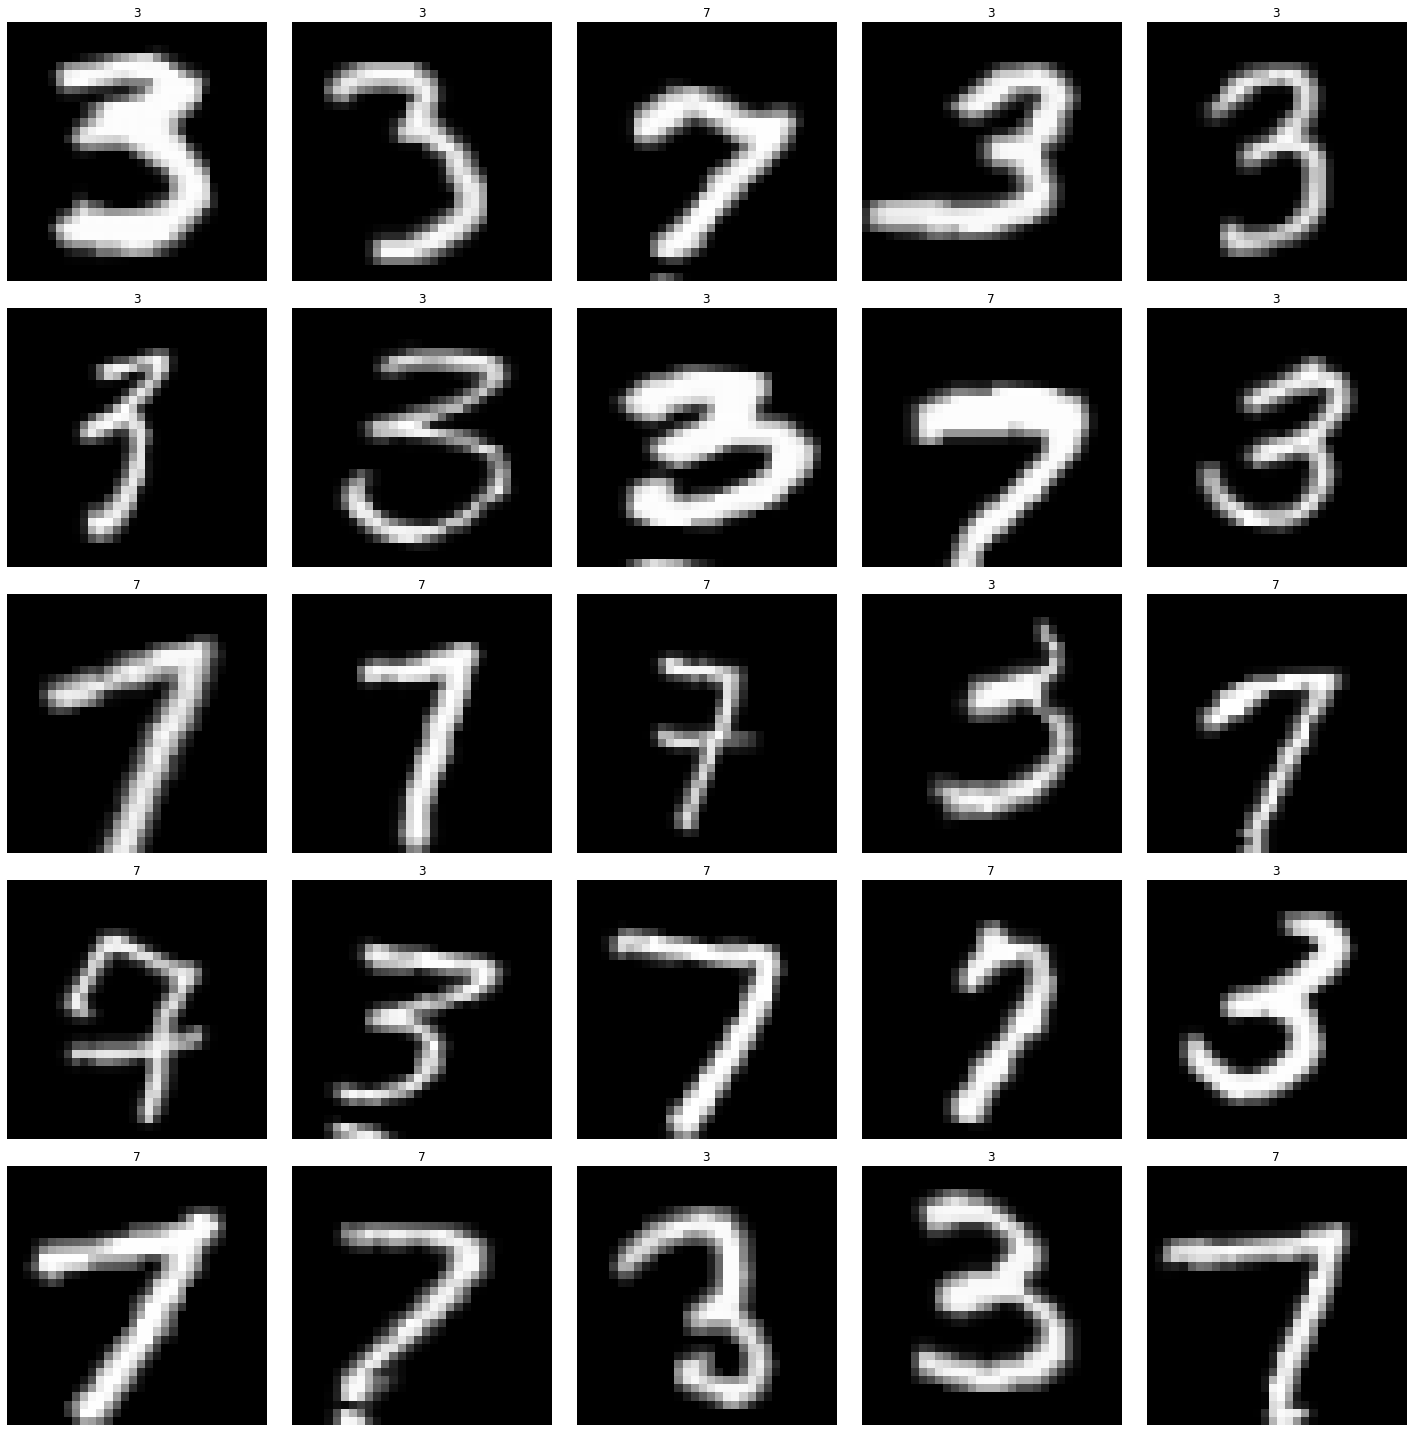

In [10]:
data = (ImageList.from_folder(path)
        .split_by_folder()          
        .label_from_folder()
        .transform(tfms, size=32)
        .databunch()
        .normalize(imagenet_stats))
data.show_batch();

In [11]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(1,1e-2)
learn.save('mini_train')


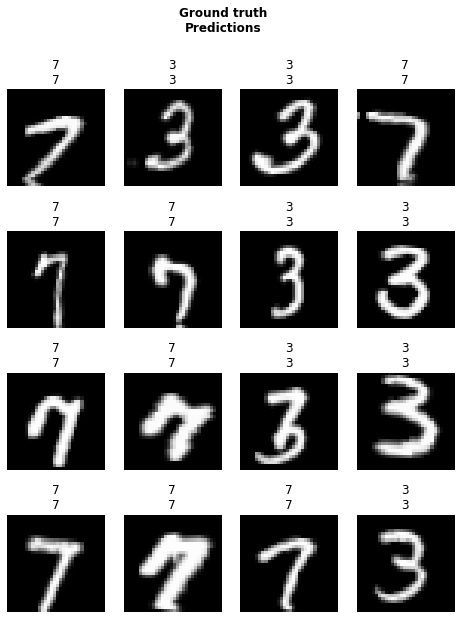

In [12]:
learn.show_results(ds_type=DatasetType.Train, rows=4, figsize=(8,10))